In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# first need to install: pip install html5lib
# TAGS
# pandas, map, lambda, concat data frames, groupby

In [4]:
# read data
df1 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=60103', header=0)[0]   # Wrocław Gł.
df2 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=33605', header=0)[0]   # Warszawa Centralna
df3 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=46409', header=0)[0]   # Łódź Widzew
df4 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=30601', header=0)[0]   # Poznań  Główny
df5 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=273', header=0)[0]     # Szczecin Główny
df6 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=5900', header=0)[0]    # Gdynia Główna

# concate data frames
frames = [df1,df2,df3,df4]
data = pd.concat(frames)

# remove polish fonts for better processing later
data=data.rename(columns = {'Opóźnienie':'Opoznienie'})

# remove "min" from "Opóźnienie"
data['Opoznienie'] = data['Opoznienie'].map(lambda x: float(x.rstrip(' min')))
# sort data
data = data.sort_values(by='Opoznienie', ascending=0)

print('Before removing duplicates: '+str(len(data.index)))
data = data.drop_duplicates(subset='Numer pociągu')
print('After removing duplicates: '+str(len(data.index)))

# print first 10 records
data[:10]

Before removing duplicates: 79
After removing duplicates: 79


,Numer pociągu,Przewoźnik,Data,Relacja,Przyjazd planowo,Opoznienie
0,84107/6 DOBRAWA,PKP Intercity,2017-05-15,Szczecin Główny - Katowice,08:42,32.0
20,84107/6 (5791)DOBRAWA,PKP Intercity,2017-05-15,Szczecin Główny - Katowice,10:49,20.0
11,1600/1,PKP Intercity,2017-05-15,Warszawa Wschodnia - Wrocław Główny,09:47,7.0
3,57102/3 STOCZNIOWIEC,PKP Intercity,2017-05-15,Bydgoszcz Główna - Zielona Góra,09:05,6.0
4,16102/3 ORZESZKOWA,PKP Intercity,2017-05-15,Białystok - Jelenia Góra,09:02,3.0
18,6122/3 (67)ŁUŻYCE,PKP Intercity,2017-05-15,Wrocław Główny - Warszawa Wschodnia,09:53,1.0
15,5606/7 (41)PIAST,PKP Intercity,2017-05-15,Gdynia Główna - Wrocław Główny,09:46,0.0
8,11311,Łódzka Kolej Aglomeracyjna,2017-05-15,Łowicz Główny - Łódź Widzew,09:51,0.0
14,53106/7 SUKIENNICE,PKP Intercity,2017-05-15,Gdynia Główna - Kraków Główny Osobowy,14:23,0.0
13,41310,Przewozy Regionalne,2017-05-15,Częstochowa - Łódź Fabryczna,11:01,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11883a940>]], dtype=object)

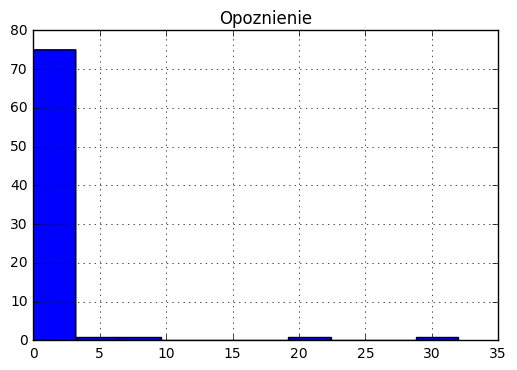

In [8]:
#data.plot.hist('Opoznienie')
pd.DataFrame.hist(data, 'Opoznienie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1188c3f28>]], dtype=object)

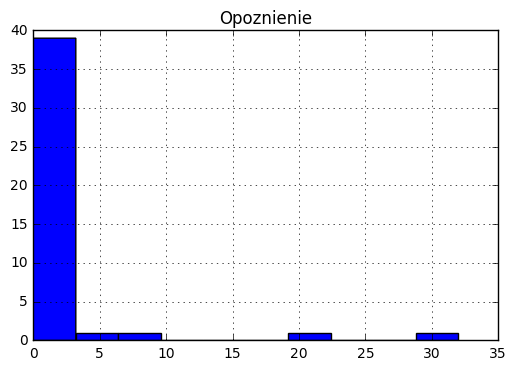

In [14]:
#data.loc[data['Przewoźnik'] == "PKP Intercity"]
#print(str(len(data.loc[data['Przewoźnik'] == "PKP Intercity"].index)))
pd.DataFrame.hist(data.loc[data['Przewoźnik'] == "PKP Intercity"], 'Opoznienie')

In [9]:
# operator -- liczba pociagow -- srednie opoznienie
data.groupby('Przewoźnik').agg(['mean', 'count'])

Opoznienie      
                                 mean count
Przewoźnik                                 
Koleje Dolnośląskie          0.000000     4
Koleje Mazowieckie           0.000000     2
Koleje Wielkopolskie         0.000000     8
PKP Intercity                1.604651    43
Przewozy Regionalne          0.000000    19
SKM Warszawa                 0.000000     1
Łódzka Kolej Aglomeracyjna   0.000000     2

# Pomysł

Najpierw można tworzyć histogram w czasie rzeczywistym pokazujący aktualne opóźnienia pociągów. Potem moża trenować sieć neuronową, która przewidywałaby opóźnienia danych pociągów na danej stacji.

Prawdopodobnie opóźnienia pociągów są nieliniowe, tzn., powiedzmy, 80% opóźnień powstaje dla 20% pociągów. Albo 80% opóźnień powstaje na 20% odcinków (Pareto).

# Dane

Warto byłoby mieć też ostateczne opóźnienie danego pociągu, tj. na stacji docelowej. Dane można zbierać cyklicznie. Ciekawe, czy PKP udostępniłoby dane historyczne.

# Komentarze

- Likwidacja duplikatów może generować błędy ponieważ niektóre pociągi z jakiegoś powodu wydają się zmieniać nazwę/numer już w trasie.
- Wykres: opóźnienie w f. dł. trasy?
- Średnie opóźnienie dla danego dworca -- lista najbardziej opóźnionych dworców.
- Id dworców wpisywałem ręcznie. Dałoby się zrobić pętlę i przeszukać wszystkie id (ok. 500 dworców w Polsce). Numeracja dworców zastosowana przez PKP jest dla mnie niejasna (zresztą jak numeracja miejsc w pociągach).
- Wizualizacja: węzły sieci -- stacje kolejowe, kolorowa skala oznaczająca (średnie) opóźnienie na danej stacji.